In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import AutomationModule as AM
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import imageio
import matplotlib

tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [2]:
import AutomationModule as AM
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Beam Spreading RCP Tight pulse 0.31 - 0.35 nu 72x72x16 Absorbers/z_incidence/RCP_d_t_Localization 0.31 - 0.35 - Sample_0.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Beam Spreading RCP Tight pulse 0.39 - 0.43 nu 72x72x16 Absorbers/z_incidence/RCP_d_t_Localization 0.39 - 0.43 - Sample_0.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Beam Spreading RCP Tight pulse 0.39 - 0.43 nu 72x72x16 Absorbers/z_incidence/RCP_d_t_Localization 0.39 - 0.43 - Sample_0 Flux Time Monitor Only.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Beam Spreading RCP Tight pulse 0.39 - 0.43 nu 72x72x16 Absorbers/z_incidence/RCP_d_t_Localization 0.39 - 0.43 - Sample_0 Gaussian Beam.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Beam Spreading RCP Tight pulse 0.39 - 0.43 nu 72x72x16 Absorbers/z_incidence/RCP_d_t_Localization 0.39 - 0.43 - Sample_0 Perm Background 13.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Time Monitors Planewave RCP Tight pulse 0.39 - 0.43 nu 18x18x18/z_incidence/RCP_d_t_Localization 0.39 - 0.43 - Sample_0 Perm Background 13.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Time Monitors Planewave RCP Tight pulse 0.39 - 0.43 nu 18x18x18/z_incidence/RCP_d_t_Localization 0.31 - 0.35 - Sample_0 Perm Background 13.txt")
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Time Monitors Planewave RCP Tight pulse 0.39 - 0.43 nu 18x18x18/z_incidence/RCP_d_t_Localization 0.31 - 0.35 - Sample_0 Perm Background 13 300 absorbers.txt")
structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="data/Time Monitors Planewave RCP Tight pulse 0.39 - 0.43 nu 18x18x18/z_incidence/RCP_d_t_Localization 0.31 - 0.35 - Sample_0 Perm Background 13 400 absorbers.txt")





Configured successfully.
output/data/Time Monitors Planewave RCP Tight pulse 0.39 - 0.43 nu 18x18x18/z_incidence/RCP_d_t_Localization 0.31 - 0.35 - Sample_0 Perm Background 13 400 absorbers.txt/Data


14:07:40 W. Europe Daylight Time Unable to download                             
                                 'output/simulation_data.hdf5.gz'.

Output()

14:07:42 W. Europe Daylight Time loading simulation from output/data/Time       
                                 Monitors Planewave RCP Tight pulse 0.39 - 0.43 
                                 nu 18x18x18/z_incidence/RCP_d_t_Localization   
                                 0.31 - 0.35 - Sample_0 Perm Background 13 400  
                                 absorbers.txt/Data_0.hdf5

                                 WARNING: updating Simulation from 2.5 to 2.7   

                                 WARNING: Simulation final field decay value of 
                                 4.87e-15 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

14:12:14 W. Europe Daylight Time loading simulation from output/data/Time       
                                 Monitors Planewave RCP Tight pulse 0.39 - 0.43 
                                 nu 18x18x18/z_incidence/RCP_d_t_Localization   
                                 0.31 - 0.35 - Sample_0 Perm Background 13 400  
                                 absorbers.txt/Data.hdf5

14:12:30 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 1.39e-10 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

In [3]:
def create_movie(field_time_out, monitor_lambdas,name='',type='t',log=False,path="",frames_per_second=1,rem_frames=False, normalize=True, a=5/3):
    frames = []

    max_values = field_time_out.max(axis=(0,1,2)) if normalize else 1

    field_time_out = field_time_out/max_values
    field_time_out['x'] = field_time_out['x']/a
    field_time_out['y'] = field_time_out['y']/a
    field_time_out['z'] = field_time_out['z']/a


    if log:
        field_log = np.log10((field_time_out))
        folder_pics = "logPics"
        
    else:
        field_log = ((field_time_out))
        folder_pics = "linPics"

    if not os.path.exists(f'{path}/{folder_pics}'):
            os.makedirs(f'{path}/{folder_pics}')
            print(f"Folder {path}/{folder_pics} created successfully.")

    for i, time in enumerate(field_time_out.t):
        if os.path.isfile(f'{path}/{folder_pics}/frame_{i}.png'):
            frames.append(f'{path}/{folder_pics}/frame_{i}.png')
            continue
        try:
            #fig, ax = plt.subplots(figsize=(14/2, 18/2))
            fig, ax = plt.subplots(figsize=(12, 6))
            if type=="t":
                pcolormesh = (field_log).isel(t=i).squeeze().plot.pcolormesh(ax=ax,cmap="rainbow")
            else:
                pcolormesh = (field_log).isel(f=i).squeeze().plot.pcolormesh(ax=ax,cmap="rainbow")

            ax.set_aspect('auto', adjustable='box')
            #plt.ylim(-50,50)
            try:
                plt.title(f'Time: {str(np.array(field_time_out['t'][()][i])*1e12)} ps')
            except:
                plt.title(f'$\\nu$: {(1/np.array(td.C_0/field_time_out['f'][()][i])):.4g}')


            # Save the frame
            plt.savefig(f'{path}/{folder_pics}/frame_{i}.png')
            plt.close(fig)
            frames.append(f'{path}/{folder_pics}/frame_{i}.png')
        except:
            break
        

    name_movie = f'{path}/{name}.mp4' if name else f'output/anderson/d(t) analysis/Diameter d(t) at output of the structure Range - {monitor_lambdas[0]:.3g} - {monitor_lambdas[-1]:.3g}.mp4'
    with imageio.get_writer(name_movie, fps=frames_per_second) as writer:
        for frame in frames:
            image = imageio.imread(frame)
            writer.append_data(image)

    # Optionally, remove the individual frames if no longer needed
    if rem_frames:
        for frame in frames:
            os.remove(frame)
    
    return False

In [4]:
a=5/3
#lambdas =  a/np.array([0.39,0.43])
lambdas =  a/np.array([0.31,0.35])

In [5]:

#field_time_out = structure_1.sim_data.get_intensity("time_monitorFieldOut")
field_time_out = structure_1.sim_data.get_intensity("time_monitorFieldLateral")

#del structure_1
np.shape(field_time_out)

(1, 366, 446, 2364)

In [6]:
font = {
        'weight' : 'bold',
        'size'   : 6}

matplotlib.rc('font', **font)
create_movie(field_time_out,a/lambdas,name=f"timemonitor {a/lambdas[0]:.3g} - {a/lambdas[-1]:.3g}",type="t",log=False,path=f"output/3D SHU/Beam Spreading",frames_per_second=10,normalize=True)

Folder output/3D SHU/Beam Spreading/linPics created successfully.


C:\Users\HernandF\AppData\Local\Temp\ipykernel_26940\2267713393.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1200, 600) to (1200, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


False

In [7]:
create_movie(field_time_out,a/lambdas,name=f"timemonitorlog {a/lambdas[0]:.3g} - {a/lambdas[-1]:.3g}",type="t",log=True,path=f"output/3D SHU/Beam Spreading",frames_per_second=10, normalize = True)


c:\Users\HernandF\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\core\computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Folder output/3D SHU/Beam Spreading/logPics created successfully.


C:\Users\HernandF\AppData\Local\Temp\ipykernel_26940\2267713393.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1200, 600) to (1200, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


False

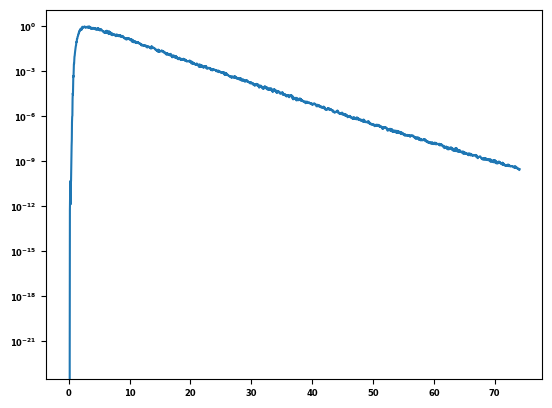

In [9]:
flux_t = structure_1.sim_data["time_monitorT"].flux
times = flux_t['t'][:]*1e12
# flux_t2 = structure_2.sim_data["time_monitorT"].flux
# times2 = flux_t2['t'][:]*1e12


plt.plot(times,(flux_t/np.max(flux_t)))
# plt.plot(times2,(flux_t2/np.max(flux_t2)))
plt.yscale("log")
